<a href="https://colab.research.google.com/github/ram-anand/ram-anand.github.io/blob/main/List_of_Dimensionality_Reduction_Techniques_and_Examples_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Problem With Many Input Variables

- If your data is represented using rows and columns, such as in a spreadsheet, then the input variables are the columns that are fed as input to a model to predict the target variable. Input variables are also called features.
- The **curse of dimensionality** refers to all the problems that arise when working with data in the higher dimensions, that did not exist in the lower dimensions.
  - **Sample size**: As the number of features increase, the number of samples also increases proportionally. The more features we have, the more number of samples we will need to have all combinations of feature values well represented in our sample.
  - **Data fit for purpose**: Having a small dataset with large number of feature may become non-representative sample and may impact the performance of the machine learning model
  - **Model Complexity**: As the number of features increases, the model becomes more complex. The more the number of features, the more the chances of overfitting. A machine learning model that is trained on a large number of features, gets increasingly dependent on the data it was trained on and in turn overfitted, resulting in poor performance on real data, beating the purpose. Some algorithms do not perform well when we have a large dimensions.
  - **Storage and training**: High dimension means large input data matrix and requires lot many parameters to be estimated. Less dimensions mean less computing. Less data means that algorithms train faster and requires less storage space.
  - **Multicolinearity or Redundant Features**: Highly correlated variables or Redundant features does not bring any value to the model and increases the storage and training effort.
  - **Data interpretation and visualization**: The higher the number of features, the harder it gets to visualize the training set and then work on it.

<figure>
<center>
<img src="https://miro.medium.com/max/765/1*vah8IolNqlxNHq9ysVzYkw.png" width="400"/>
<figcaption>Source: medium.com</figcaption></center>
</figure>






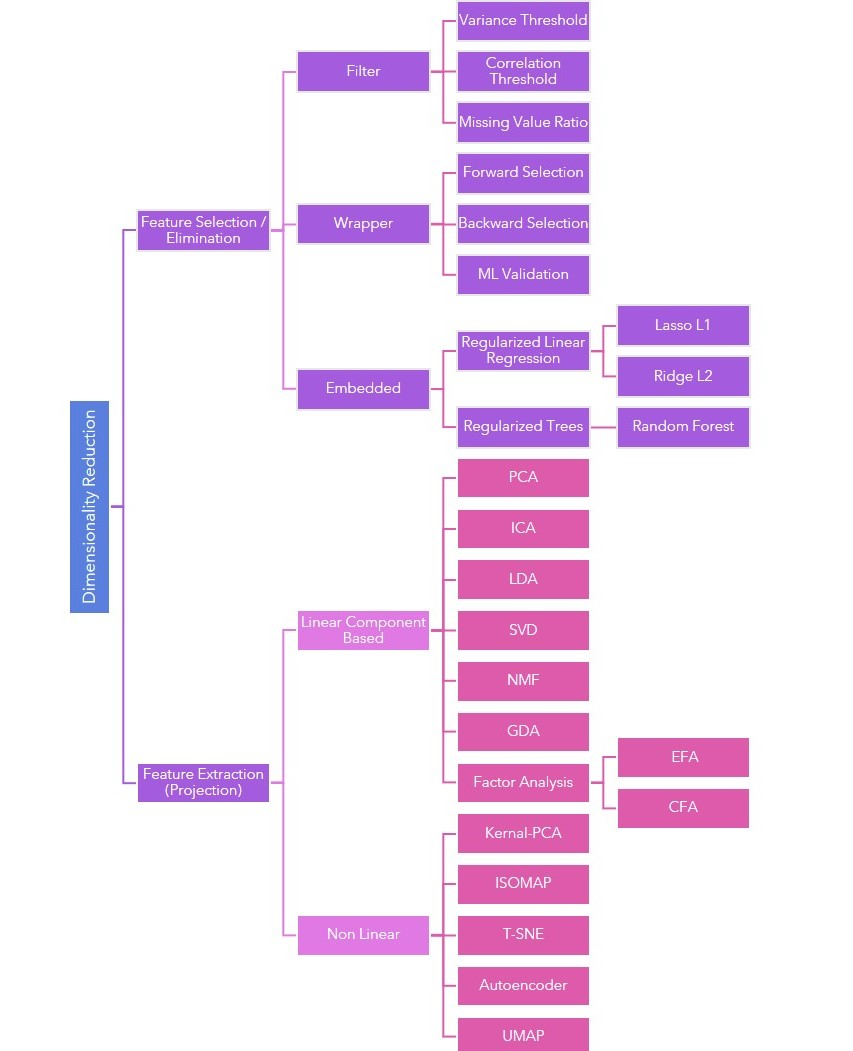

# Feature Selection (Elimination)

Only keeping the most relevant variables from the original dataset

Let’s imagine our dataset also has a column on customers’ favorite movies, and we realize that this is not incredibly helpful in helping us predict how much they’ll spend at our store. With feature selection, we’d just exclude this entire feature. This particular example might be obvious, but that isn’t always the case. We can perform feature selection programmatically via three key methods: wrapper, filter, and embedded methods.





Techniques for Dimensionality Reduction
- Feature Selection Methods
- Matrix Factorization
- Manifold Learning
- Autoencoder Methods
Tips for Dimensionality Reduction

## Filter Methods

Filter methods apply a threshold on a statistical measure to determine whether a feature will be useful. Two key methods include:

- Variance thresholds - Remove any features that don’t vary widely. For example, in our Willy Wonka dataset, we can see that all of our customers live in the U.S., so that feature would have a variance of 0, and we’d likely want to remove it.
- Correlation thresholds - Remove highly correlated features, as the data is redundant. For example, let’s imagine that we also had a year of birth column in the above dataset. This would be highly correlated with our age column and would not be helpful in generating any stronger predictions.

These methods are very straightforward and intuitive. However, they require manual setting of a threshold which can be dangerous, as too low of a threshold may mean the removal of important information. 

Additionally, these two methods are often not sufficient if we want to seriously reduce the dimensionality of our dataset.


### Variance Threshold

Variance Threshold is a baseline approach to feature selection. As the name suggests, it drops all features where the variance along the column does not exceed a threshold value. 

#### Low Variance Filter
Variance thresholds remove features whose values don't change much from observation to observation (i.e. their variance falls below a threshold). These features provide little value.

For example, if you had a public health dataset where 96% of observations were for 35-year-old men, then the 'Age' and 'Gender' features can be eliminated without a major loss in information.

Because variance is dependent on scale, you should always normalize your features first.

- Strengths: Applying variance thresholds is based on solid intuition: features that don't change much also don't add much information. This is an easy and relatively safe way to reduce dimensionality at the start of your modeling process.
- Weaknesses: If your problem does require dimensionality reduction, applying variance thresholds is rarely sufficient. Furthermore, you must manually set or tune a variance threshold, which could be tricky. We recommend starting with a conservative (i.e. lower) threshold.
Implementations: Python / R

Feature selection is the process of identifying and selecting relevant features for your sample. 
Feature selection can be done either manually or programmatically.
- Manually: by examining correlation between features 
- Variance Threshold
- Univariate selection

Methods listed under Feature Selection/Elimination below are usually employed during the data pre-processing stage or prior to the predictive modelling stage.

Feature Selection / Elimination (Pre-Modelling)
Dropping Features with Missing Values

Dropping Features or observations with missing values should be the option of the last resort and it is always advisable to go back to the data source and try to plug in the missing values or if not possible to impute the same. However dropping columns with percentage or ratio of missing values above a threshold is also an option, though there is no hard and fast threshold cut-off.

In [ ]:
>>> X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
>>> selector = VarianceThreshold()
>>> selector.fit_transform(X)
array([[2, 0],
       [1, 4],
       [1, 1]])

#### **Univariate Selection**

Univariate describes a type of data which consists of observations on only a single characteristic or attribute.

Univariate feature selection examines each feature individually to determine the strength of the relationship of the feature with the response variable. It uses statistical tests to select features.

Some examples of statistical tests that can be used to evaluate feature relevance are 
- Pearson Correlation, 
- Maximal information coefficient, 
- Distance correlation, 
- ANOVA and 
- Chi-square. 

Chi-square is used to find the relationship between categorical variables and Anova is preferred when the variables are continuous.



### Correlation Thresholds

Correlation thresholds remove features that are highly correlated with others (i.e. its values change very similarly to another's). These features provide redundant information.

- High Correlation filter
High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).

As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.

For example, if you had a real-estate dataset with 'Floor Area (Sq. Ft.)' and 'Floor Area (Sq. Meters)' as separate features, you can safely remove one of them.

Which one should you remove? Well, you'd first calculate all pair-wise correlations. Then, if the correlation between a pair of features is above a given threshold, you'd remove the one that has larger mean absolute correlation with other features.

- Strengths: Applying correlation thresholds is also based on solid intuition: similar features provide redundant information. Some algorithms are not robust to correlated features, so removing them can boost performance.
- Weaknesses: Again, you must manually set or tune a correlation threshold, which can be tricky to do. Plus, if you set your threshold too low, you risk dropping useful information. Whenever possible, we prefer algorithms with built-in feature selection over correlation thresholds. Even for algorithms without built-in feature selection, Principal Component Analysis (PCA) is often a better alternative.
Implementations: Python / R

## Wrapper Methods

Wrapper methods iterate through different combinations of features and perform a model retrain on each. The feature combination which resulted in the best model performance metric (accuracy, AUC, RMSE, etc.) is selected.

Two key wrapper methods include:
- Forward selection
- Backward elimination

NOTE : Both Backward Feature Elimination and Forward Feature Selection are time consuming and computationally expensive.They are practically only used on datasets that have a small number of input variables.


### **Forward selection**

Begin with zero features in your model and iteratively add the next most predictive feature until no additional performance is reached with the addition of another feature.

This is the inverse process to backward feature elimination. We start with one column only, progressively adding one column at a time, i.e., the column that produces the highest increase in performance. Both algorithms, backward feature elimination and forward feature construction, are quite expensive in terms of time and computation. They are practical only when applied to a dataset with an already relatively low number of input columns.

Steps:
- We start with a single feature. Essentially, we train the model n number of times using each feature separately
- The variable giving the best performance is selected as the starting variable
- Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained
- We repeat this process until no significant improvement is seen in the model’s performance


In [ ]:
# Forward Feature Selection
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.Item_Outlet_Sales )
variable = []
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df.columns[i])

### **Backward elimination**

Begin with all features in your model and iteratively remove the least significant feature until performance starts to drop.
These methods are typically not preferred as they take a long time to compute and tend to overfit.

In this technique, at a given iteration, the selected classification algorithm is trained on n input columns. Then we remove one input column at a time and train the same model on n-1 columns.  The input column whose removal has produced the smallest increase in the error rate is removed, leaving us with n-1 input columns. The classification is then repeated using n-2 columns, and so on. Each iteration k produces a model trained on n-k columns and an error rate e(k). By selecting the maximum tolerable error rate, we define the smallest number of columns necessary to reach that classification performance with the selected machine learning algorithm.

Steps:
- We first take all the n variables present in our dataset and train the model using them
- We then calculate the performance of the model
- Now, we compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables
- We identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable
- Repeat this process until no variable can be dropped

In [ ]:
# Backward Feature Elimination
#We need to specify the algorithm and number of features to select, and 
#we get back the list of variables obtained from backward feature elimination. 
#We can also check the ranking of the variables using the “rfe.ranking_” command.
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit_transform(df, train.Item_Outlet_Sales)

## Embedded Methods

Embedded feature selection combines key features of wrapper and filter methods and is often a great place to start, as long as you’re using a compatible algorithm.

Certain machine learning algorithms are able to embed feature selection into the model training process. Key embedded methods include:

- **Regularized linear regression** - These methods add a penalty that corresponds to the value of the coefficients. This way, coefficients with lower predictive power are weighted less heavily, and the overall variance of the dataset is reduced. There are two key types of regularized linear regression:
  - **Lasso regression** - In lasso regression, also referred to as L1 regularization, the penalty is equivalent to the absolute value of the coefficient. This means that coefficients of unimportant features can be reduced to zero, which effectively eliminates them from the model.
  - **Ridge regression** - In ridge regression, also referred to as L2 regularization, the penalty is equivalent to the square of the coefficient value. Because coefficient values are squared, coefficients cannot be entirely eliminated from the model, but can be weighted less heavily.
- **Regularized trees** - When building tree-based models, we can use metrics like entropy (discussed in our tree-based models post) to measure feature importance and can then elect to only keep the top N most important features.




### Random Forest

Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features.

We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs. Let’s also drop the ID variables (Item_Identifier and Outlet_Identifier) as these are just unique numbers and hold no significant importance for us currently.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.Item_Outlet_Sales)

# plot the feature importance graph
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# pick the top-most features
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.Item_Outlet_Sales)

## Feature Extraction (Projection)

By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables. Feature engineering is manually generating new features from existing features, by applying some transformation or performing some operation on them.

Feature extraction allows us to keep parts of features, so that we just keep the most helpful bits of each feature. This way, we don’t lose too much information by removing entire features. Principal Component Analysis (PCA) is far and away the most common method of performing feature extraction and is the method we’ll explore in this post.

<figure>
<img src="https://miro.medium.com/max/1050/1*4ibdHcy6xlV7-HU3KjonsQ.png" width="450"/>
<figcaption>PCA orients data along the direction of the component with maximum variance whereas LDA projects the data to signify the class separability</figcaption>
</figure>

### Principal Component Analysis (PCA) - Unsupervised

**Objective**: Higher dimensional space is mapped (projected) to data in a lower dimension space, maximizing the explained variance in lower dimension space.

Popularly used for dimensionality reduction in continuous data, PCA rotates and projects data along the direction of increasing variance. The features with the maximum explained variance are the principal components.

The purpose of PCA is to reduce the number of features included while still capturing the key information, or the spread of the data, as measured by the total variance.

- **Feature scaling** is required prior to PCA
- PCA technique generates smaller feature set by linearly combining the features within the original feature(variables) set. The new features are called principal components. 
- PCA works on eigen decomposition. It uses **Covariance matrix** as a measure of how each variable is associated with one another and finds orthogonal components (**Principal components**) that explains total variablility of the data. The directions in which data are dispersed are explained by **Eigenvectors**. The relative importance of these different directions are given by **Eigenvalues**.
- Principal components are extracted in such a way that the principal components explains total variance in the dataset in decreasing order of variance
  - The first principal component is the line which captures the majority of the variance within the dataset,
  - the second principal component captures the second most variance
  - Third principal component tries to explain the variance which is not explained by the first two principal components and so on
- Each of these principal components is orthogonal to the next that means they are uncorrelated.
- Dimensionality reduction on dataset is performed by selecting only significant principal components using a threshold (removing the least significant PCs) for model training
- PCA combine original feature to create new orthogonal features which can not be intrepretable in practical terms. If interpretation is important, unfortunately PCA will likely be problematic.

>Note:
- We should only use training data for PCA components. Because, this would violate the entire assumption of generalization since test data would get ‘leaked’ into the training set.
- We should not perform PCA on test and train data sets separately. Because, the resultant vectors from train and test PCAs will have different directions (due to unequal variance)
- For Test set, we should use same transformation as we did to training set, including the center and scaling feature.

<figure>
<img src="https://blog.dataiku.com/hs-fs/hubfs/kg1.png?width=437&name=kg1.png" width="350"/>
<img src="https://blog.dataiku.com/hs-fs/hubfs/kg2.png?width=521&name=kg2.png" width="450"/>
<figcaption></figcaption>
</figure>

It involves the following steps:

- Standardize the input data
- Construct the covariance matrix of the data.
- Compute the eigenvectors of this matrix.
- Eigenvectors corresponding to the largest eigenvalues are used to reconstruct a large fraction of variance of the original data.

Hence, we are left with a lesser number of eigenvectors, and there might have been some data loss in the process. But, the most important variances should be retained by the remaining eigenvectors.

>There are two key methods of computing the principal components 
- **Eigen decomposition** and 
- **Singular value decomposition (SVD)**

Advantages of Dimensionality Reduction
- It helps in data compression, and hence reduced storage space.
- It also helps remove redundant features, if any.
- PCA is fast and simple to implement, which means you can easily test algorithms with and without PCA to compare performance. In addition, PCA offers several variations and extensions (i.e. kernel PCA, sparse PCA, etc.) to tackle specific roadblocks.

Disadvantages of Dimensionality Reduction
- It may lead to some amount of data loss.
- PCA tends to find linear correlations between variables, which is sometimes undesirable.
- PCA fails in cases where mean and covariance are not enough to define datasets.
- We may not know how many principal components to keep- in practice, some thumb rules are applied.
- The new principal components may not be interpretable to business, which may be a deal-breaker in some settings. In addition, we need to still manually set or tune a threshold for cumulative explained variance.

<img src="https://hackernoon.com/drafts/kk19133no.png" width="800"/>



### How PCA works

Solving PCA: Eigenvectors of Covariance

Solution to PCA is based on an important property of eigenvector decomposition.

<figure>
<center>
<img src="https://miro.medium.com/max/932/1*k8Ls7KtaaRUCk1ftuIRrTw.png" width="400"/>
<figcaption>Columns are variables, and rows are observations</figcaption></center>
</figure>

#### Matrix Dimension
- $X_{n,p}$ = Input data or original features matrix
- $Z_{n,p}$ = Transformed (new features) data or principal components matrix
- $D_{p,p}$ = Diagonal matrix whose diagnoal elements are Eigen values ($\lambda_j$) of $X^T X$, a symmetric and diagonal matrix
- $E_{p,p}$ = Eigen vector matrix, each column is a eigen vector for each eigen value $\lambda_j$ of covariance matrix $X^TX$, a symmetric matrix
- $S_X$ = $\sum$ = $\frac{1}{n-1}X^TX$ = Covarinance matrix (pxp) of original features, a symmetric matrix
- $X^TX$ = Product matrix (pxp) of original features, a symmetric matrix
- $S_Z \equiv \frac{1}{n-1}Z^TZ$ = Covarinance matrix(pxp) of new features (transformed) or principal components, a symmetric matrix
- n = number of training examples
- p = number of input features (variables) 

Input or original feature matrix
>\begin{equation} X_{n,p} =
\begin{bmatrix}
X^1_1 & X^1_2 & X^1_3 & \ldots & X^1_p\\
X^2_1 & X^2_2 & X^2_3 & \ldots & X^2_p\\
\ldots & \ldots& \ldots & \ldots & \ldots\\ 
X^n_1 & X^n_2 & X^n_3 & \ldots & X^n_p\\
\end{bmatrix}
\end{equation}

Transformed or new feature matrix (principal components) 
>\begin{equation} Z_{n,p} = 
\begin{bmatrix}
\sum_{i=1}^{p}X^1_ie^{\lambda_1}_i & \sum_{i=1}^{p}X^1_ie^{\lambda_2}_i & \ldots & \sum_{i=1}^{p}X^1_ie^{\lambda_p}_i\\
\sum_{i=1}^{p}X^2_ie^{\lambda_1}_i & \sum_{i=1}^{p}X^2_ie^{\lambda_2}_i & \ldots & \sum_{i=1}^{p}X^2_ie^{\lambda_p}_i\\
\ldots & \ldots & \ldots & \ldots\\
\sum_{i=1}^{p}X^n_ie^{\lambda_1}_i & \sum_{i=1}^{p}X^n_ie^{\lambda_2}_i & \ldots & \sum_{i=1}^{p}X^n_ie^{\lambda_p}_i\\
\end{bmatrix}
= \begin{bmatrix}(X^1_1e^{\lambda_1}_1+X^1_2e^{\lambda_1}_2+X^1_3e^{\lambda_1}_3+X^1_pe^{\lambda_1}_p) & (X^1_1e^{\lambda_2}_1+X^1_2e^{\lambda_2}_2+X^1_3e^{\lambda_2}_3+X^1_pe^{\lambda_2}_p) & \ldots & \ldots & (X^1_1e^{\lambda_p}_1+X^1_2e^{\lambda_p}_2+X^1_3e^{\lambda_p}_3+X^1_pe^{\lambda_p}_p)\\
(X^1_1e^{\lambda_1}_1+X^1_2e^{\lambda_1}_2+X^1_3e^{\lambda_1}_3+X^1_pe^{\lambda_1}_p) & (X^2_1e^{\lambda_2}_1+X^2_2e^{\lambda_2}_2+X^2_3e^{\lambda_2}_3+X^2_pe^{\lambda_2}_p) & \ldots & \ldots & (X^2_1e^{\lambda_p}_1+X^2_2e^{\lambda_p}_2+X^2_3e^{\lambda_p}_3+X^2_pe^{\lambda_p}_p)\\
\ldots & \ldots& \ldots & \ldots\\ 
(X^1_1e^{\lambda_1}_1+X^1_2e^{\lambda_1}_2+X^1_3e^{\lambda_1}_3+X^1_pe^{\lambda_1}_p) & (X^n_1e^{\lambda_2}_1+X^n_2e^{\lambda_2}_2+X^n_3e^{\lambda_2}_3+X^n_pe^{\lambda_2}_p) & \ldots & \ldots & (X^n_1e^{\lambda_p}_1+X^n_2e^{\lambda_p}_2+X^n_3e^{\lambda_p}_3+X^n_pe^{\lambda_p}_p)\\
\end{bmatrix}
\end{equation}

- Each row of $Z$ is the transformed version of input variables of $X$, 
- For a training example (row), each column denotes principal components of new feature space
- The value at position (row i, col j) i.e. $Z^i_j$ represents the j-th principal component (new feature) for i-th training example, $Z^i_j = (X^i_1e^{\lambda_j}_1+X^i_2e^{\lambda_j}_2+X^i_3e^{\lambda_j}_3+X^i_pe^{\lambda_j}_p)$ 

Eigen value matrix D of ($X^TX$), a diagonal matrix:
>\begin{equation} D_{p,p} =
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0\\
0 & 0 & \lambda_3 & \ldots & 0\\
\ldots & \ldots & \ldots & \ldots & \ldots\\
0 & 0 & 0 & \ldots & \lambda_p \\
\end{bmatrix}
\end{equation}

Eigen vectors matrix for all eigen values 
>\begin{equation} E_{p,p} =
\begin{bmatrix}
e^{\lambda_1}_1 & e^{\lambda_2}_1 & e^{\lambda_3}_1 & \ldots & e^{\lambda_p}_1\\
e^{\lambda_1}_2 & e^{\lambda_2}_2 & e^{\lambda_3}_2 & \ldots & e^{\lambda_p}_2\\
\ldots & \ldots& \ldots & \ldots & \ldots\\ 
e^{\lambda_1}_p & e^{\lambda_2}_p & e^{\lambda_3}_p & \ldots & e^{\lambda_p}_p\\
\end{bmatrix}
\end{equation}

- Each columns of $E$ is loadings of principal component of $X$  i.e. eigen vectors of the covariance matrix $X^TX$. 
- In other words, each column vector $[e^{\lambda_j}_1, e^{\lambda_j}_1, ..., e^{\lambda_j}_p]$ in E is a eigen vector corresponding to the eigen value $\lambda_j$ obtained from characterisitic equation.

---
<figure><center>
<img src="http://www.sharetechnote.com/image/EngMath_Matrix_EigenDecomposition_02.png" width="400"/>
<img src="https://miro.medium.com/max/1920/1*LmD4gH0egCdRcNHhFsRJvQ.png" width="400"/>
<img src="https://miro.medium.com/max/1050/1*4dGi0pjOJLdqGTT2RT4GDg.png" width="400"/>
<img src="https://miro.medium.com/max/1050/1*SIfhs-zMVbD-i70viwtI4A.png" width="400"/>
<figcaption>Source: sharetechnote.com, medium.com@kaizhao44</figcaption></center>
</figure>

#### Find Eigen Vector

Find some orthonormal matrix $E$ where

>$Z = XE$ such that $S_Z$ is diagonalized. 

Covarinance matrix (pxp) of new features, 

>$S_Z = \frac{1}{n-1} (XE)^T XE = \frac{1}{n-1}E^T(X^TX) E$

For an orthonormal matrix $E$ 
> $E^{-1} = E^T$ and $E^{-1}E = EE^{-1} = I$

Note: 
> A symmetric matrix $X^T X$ is always diagonalized by an orthogonal matrix $E$ of whose columns are the loadings of principal components of $X$ i.e. eigen vectors of the covariance matrix $X^T X$.

$X^T X$ can be decomposed to its eigen value matrix and eigen vector matrix as below:
> $X^T X = E D E^T$

Rewriting $S_Z$, we will get:

>$S_Z = \frac{1}{n-1}E^T (X^T X) E = \frac{1}{n-1}E^T (E D E^T) E = \frac{1}{n-1}D$

It is evident that the choice of E diagonalizes $S_Z$.

In other words, if we choose E as eigen vector of $X^TX$, the covariance matrix of new features $Z = XE^T$ (i.e. $S_Z$) will be a diagonal matrix.

This was the goal for PCA. We can summarize the
results of PCA in the matrices E and $S_Z$.
- The principal components of X are the eigenvectors of $X^TX$ or the rows of E.
- The i-th diagonal value of $S_Z$ is the variance of
X along i-th principal component.

---

The matrix $X^T X$ has r ≤ p orthonormal eigenvectors
where r is the rank of the matrix. The rank of $X^T X$ is less than p when $X^T X$ is degenerate or all data occupy a subspace of dimension r ≤ p. Maintaining the constraint of orthogonality, we can remedy this situation by selecting (p − r) additional orthonormal vectors to "fill up" the eigen vector matrix $E$. These additional vectors do not effect the final solution because the variances associated with these directions are zero

In practice computing PCA considers a scaled data set wherein X is subtracted off with the mean of each original features.



### How to find Principal Components using Eigen Decomposition

New features (latent or principal components) in $Z$ are a linear combination of original features in $X$ and vice versa, 

For a training examle, the new feature space corresponding to j-th eigen value, 
> $Z_j = {E_{\lambda_j}}^TX$

Therefore, the new features can be written as
> $ Z_j = \sum_{i=1}^{p}e^{\lambda_j}_iX_i = e^{\lambda_j}_1X_1+e^{\lambda_j}_2X_2+\ldots+e^{\lambda_j}_pX_p$ where $j=1, 2, 3, ..., p$

From these p principal components, we select only top k principal components (formed using eigen vectors corresponding to largest k eigen values that explains most of the variance in the data), hence reducing the overall dimension of the dataset.

where 
- $Z_j$ is the new feature (principal component) in transformed space 
- The column vector $[e^{\lambda_j}_1, e^{\lambda_j}_1, ..., e^{\lambda_j}_p]$ in matrix E is the eigen vector corresponding to the eigen value $\lambda_j$ obtained from characterisitic equation
- We select only few $Z_j$ for model building and prediction which explains most of the explained variance in the data set
- Explained variance by j-th principal component $Z_j$, 
> $\frac{\lambda_{j}}{\sum_{j=1}^{p} \lambda_{j}}$

#### Detailed steps:

1. Standardize the data set

    This is done by subtracting the respective feature mean and dividing by the feature standard deviation for each value of each variable.

    If there are n training examples, and if we have p features (variables) $X_{1}, X_{2}, X_{p}$ then standardized features $X'$ will be

    \begin{equation} 
    \begin{bmatrix} X_1\\X_2\\ \vdots \\ X_p\end{bmatrix} \equiv 
    \begin{bmatrix} X'_1\\ X'_2\\ \vdots \\X'_p\end{bmatrix} \end{equation}

    Where,
    $X'_1 = \frac{X_1-\bar{X_1}}{s_1}$, 
    $X'_2 = \frac{X_2-\bar{X_2}}{s_2} \ldots$,
    $X'_p = \frac{X_p-\bar{X_p}}{s_p}$ 
    
    **Mean** of feature i, 
    >$\bar{X}_i = \frac{1}{n} \sum X_i$

    **Unbiased Variance** of feature i (it is an estimate of population variance),
    >$var_i = s^2_i = cov_{i,i} = \frac{\sum(X_i-\bar{X_i})^2}{n-1}$

    **Correlation** between the original feature vector i and j as 

    >$cor_{i,j} = \frac{1}{n-1} \sum_{1}^{n}\frac{(X_i-\bar{X_i})}{s_i} \frac{(X_j-\bar{X_j})}{s_j} =  \sum_{1}^{n}\frac{(X_i-\bar{X_i})}{\sqrt{{\sum(X_j-\bar{X_j})^2}}}\frac{(X_j-\bar{X_j})}{\sqrt{{\sum(X_j-\bar{X_j})^2}}}$

    **Correlation** in standardized form
    > $cor_{i,j} =  \frac{1}{n-1} \sum_{1}^{n} X'_i*X'_j$

    This produces a dataset whose mean is zero. Once the standardization is done, all the variables will be transformed to the same scale.

2. Construct **Covariance matrix $\sum$** of the standardized data (it is simply a correlation matrix of original features). Covariance matrix is a square matrix:

  > \begin{equation} \sum =
    \begin{bmatrix}
        cov_{1,1} & cov_{1,2} & cov_{1,3} & \dots  & cov_{1,p} \\
        cov_{2,1} & cov_{2,2} & cov_{2,3} & \dots  & cov_{2,p} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        cov_{p,1} & cov_{p,2} & cov_{p,3} & \dots  & cov_{p,p}
    \end{bmatrix}
    \end{equation} 

    Where, diagonal elements are variance of standardized features which is simply the unbiased variance from original features.

3. Find the Eigen vectors and Eigen values of the Covariance matrix

    If $\lambda$ is eigen value (scalar / constant) and $E$ is eigen vector of covariance matrix $\sum$, it can be written in equation form:
    > $\sum E = \lambda E$, this gives
    $(\sum - \lambda I) = 0 $

    - Find Eigen Values (the roots) using characteristic equation
    > $det(\sum - \lambda I) = 0 $ 

     In other words, 
    > $(\lambda_1-\lambda)(\lambda_2-\lambda)\ldots(\lambda_p-\lambda) = 0$

    Eigen Values (Roots) of the polynomial, $\lambda = \lambda_1, \lambda_2, \lambda_3, \ldots \lambda_p$ 

    Sum of variances of all original features = sum of diagonal elements of covariance matrix (Trace)
    > $tr(\sum) = \lambda_1 + \lambda_2 + \lambda_3 + \ldots + \lambda_p$

    > $det(\sum) = \lambda_1 * \lambda_2 * \lambda_3 * \ldots * \lambda_p$

  - Find eigenvector $E$ corresponding to each eigenvalue using below equation:
    > $(\sum - \lambda I) E = 0$

    There will be p columns of eigen vectors (also called Feature Vector or Loadings of principal component) correspondiing to each eigen value
    
    For j-th eigen value $\lambda_j$, corresponding eigen vector will be

    >  \begin{equation} E_{\lambda_k} =
    \begin{bmatrix} 
    e^{\lambda_j}_1\\e^{\lambda_j}_2\\ \vdots \\ e^{\lambda_j}_p
    \end{bmatrix}
    \end{equation}
    
    Each set of eigenvectors multiplies with the feature vector $X$ will give a new feature vector 

4. Sort the eigenvalues by decreasing order (top to bottom in the matrix) to rank the corresponding eigenvectors

    Eigen value matrix:
    \begin{bmatrix} \lambda_1\\\lambda_2\\ \vdots \\ \lambda_p\end{bmatrix}

    where, $\lambda_1 > \lambda_2 > \lambda_3 > \ldots > \lambda_p$

5. Transform p-dimensional input dataset X ($X_1, X_2, X_3, \ldots, X_p$) to obtain $Z$ ($Z_1, Z_2, Z_3, \ldots, Z_p$), a new p-dimensional feature space (each variable is called principal components)
the new feature subspace

6. Select k dimension ($Z_1, Z_2, Z_3, \ldots, Z_k$) out of all p-dimensions of $Z$ ($Z_1, Z_2, Z_3, \ldots, Z_p$) which corresponds to the k largest eigenvalues, where k is the dimensionality of new data (k < p)







In [ ]:
# PCA using Eigen Decomposition
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
#Scaling the values
X = scale(X_train)
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
#After selecting 2 PCs
pca = PCA(n_components=2)
pca.fit(X)
X1=pca.fit_transform(X)

In [ ]:
# PCA using SVD
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df[feat_cols].values)
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

### Independent Component Analysis (ICA)

It is based on information-theory and is also one of the most widely used dimensionality reduction techniques. The major difference between PCA and ICA is that PCA looks for uncorrelated factors while ICA looks for independent factors.

If two variables are uncorrelated, it means there is no linear relation between them. If they are independent, it means they are not dependent on other variables. For example, the age of a person is independent of what that person eats, or how much television he/she watches.

This algorithm assumes that the given variables are linear mixtures of some unknown latent variables. It also assumes that these latent variables are mutually independent, i.e., they are not dependent on other variables and hence they are called the independent components of the observed data.

Here, image (a) represents the PCA results while image (b) represents the ICA results on the same dataset.

The equation of PCA is x = Wχ.

Here,

x is the observations
W is the mixing matrix
χ is the source or the independent components
Now we have to find an un-mixing matrix such that the components become as independent as possible. Most common method to measure independence of components is Non-Gaussianity:

As per the central limit theorem, distribution of the sum of independent components tends to be normally distributed (Gaussian).

So we can look for the transformations that maximize the kurtosis of each component of the independent components. Kurtosis is the third order moment of the distribution. To learn more about kurtosis, head over here.
Maximizing the kurtosis will make the distribution non-gaussian and hence we will get independent components

In [ ]:
# ICA
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(df[feat_cols].values)
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
plt.scatter(X[:,2], X[:,0])

### Linear discriminant analysis (LDA) - Supervised

(not to be confused with latent Dirichlet allocation) 

**Objective**: Higher dimensional space is mapped (projected) to data in a lower dimension space, maximizing ratio of between class variation and within class variation in lower dimension space.

- **Feature Scaling** and normalization is required prior to LDA transformation
- LDA is a supervised method that can only be used with labeled data. It is commonly used for the supervised classification problems
- Unlike PCA, LDA doesn't maximize explained variance. Instead, it maximizes the separability between classes.
- LDA maximize the distance between means of the classes, and minimize the variation within each class

Extensions to LDA:
- Quadratic Discriminant Analysis (QDA): Each class uses its own estimate of variance (or covariance when there are multiple input variables).
- Flexible Discriminant Analysis (FDA): Where non-linear combinations of inputs is used such as splines.
- Regularized Discriminant Analysis (RDA): Introduces regularization into the estimate of the variance (actually covariance), moderating the influence of different variables on LDA.

Notes:
- Strengths: LDA is supervised, which can (but doesn't always) improve the predictive performance of the extracted features. Furthermore, LDA offers variations (i.e. quadratic LDA) to tackle specific roadblocks.
- Weaknesses: As with PCA, the new features are not easily interpretable, and you must still manually set or tune the number of components to keep. LDA also requires labeled data, which makes it more situational.
Implementations: Python / R




Linear discriminant analysis
LDA is a classification and dimensionality reduction techniques, which can be interpreted from two perspectives. The first is interpretation is probabilistic and the second, more procedure interpretation, is due to Fisher. The first interpretation is useful for understanding the assumptions of LDA. The second interpretation allows for a better understanding on how LDA performs dimensionality reduction.

The probabilistic interpretation

Each class k∈{1,…,K} is assigned a prior π^k such that that ∑ki=1π^k=1. According to Bayes’ rule, the posterior probability is

$Pr(G=k|X=x)=fk(x)πk∑Kl=\sum_{l=1}^{k}f_l(x)π_l$

where fk(x) is the density of X conditioned on k. The maximum-a-posteriori (MAP) estimator simplifies to

G(x)=argmaxkPr(G=k|X=x)=argmaxkfk(x)πk

because the denominator is identical for all classes.

LDA assumes that the density is Gaussian:

fk(x)=|2πΣk|−1/2exp(−12(x−μk)TΣ−1k(x−μk))

where Σk is the covariance matrix for the samples from class k and |.| is the determinant. LDA assumes that all classes have the same covariance matrix, i.e. Σk=Σ,∀k.

Plugging fk into the classification function, we arrive at the classification function:

G(x)=argmaxkδk(x)

where

δk(x)=xTΣ−1μk−12μTkΣ−1μk+logπk

is the discriminant function for class k. So, now that we have a classifier, how we can compute it?

To find the covariance matrix, we simply compute

Σ^=∑k=1K1N−K∑gi=k(xi−μ^k)(xi−μ^k)T.

Note that the deviation from the means is divided by N−K, the degrees of freedom, to obtain an unbiased estimator.

The means of the classes, which are also called centroids, are defined by

μ^k=1Nk∑gi=kxi.

The priors πk are set to the prevalence ratio of the class-specific observations:

π^k=NkN.

With this, we have defined all parameters required for the classifier.

The dimensionality reduction procedure of LDA involves the within-class variance, W=Σ^, and the between-class variance, B. The between-class variance indicates the deviation of centroids from the overall mean, μ^=∑Kk=1π^kμ^k, and is defined as:

B=∑k=1Kπ^k(μ^k−μ^)(μ^k−μ^)T.

Finding a sequence of optimal substeps involves three steps:

Compute the K×p matrix M containing the centroids, μk, and determine the common covariance matrix W.
Compute M∗=MW−12 using the eigen-decomposition of W.
Compute B∗ (the between-class covariance) and its eigen-decomposition B∗=V∗DBV∗T. The columns v∗l of V∗ define the coordinates of the reduced subspace.
The l-th discriminant variable (one of the K−1 new dimensions) is determined by Zl=vTlX with vl=W−12v∗l.

### Factor Analysis

Factor Analysis a technique that is used to reduce a large number of variables into fewer numbers of factors. The values of observed data are expressed as functions of a number of possible causes in order to find which are the most important. The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise.

In the Factor Analysis technique, variables are grouped by their correlations, i.e., all variables in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). Here, each group is known as a factor. These factors are small in number as compared to the original dimensions of the data. However, these factors are difficult to observe.

## Feature Importance

Methods listed under Feature Importance involve fitting a predictive model to the dataset. The objective here is to identify the top independent features that contribute to the variations in the target feature. This is done either by starting with an individual feature and adding more to see the impact on model performance or starting with the full model and eliminating one feature at a time from the model to asses the impact on model performance.

## Linear Dimensionality Reduction Methods

The most common and well known dimensionality reduction methods are the ones that apply linear transformations, like

- Pricipal Component Analysis (PCA)
- Linear Discriminant Ananlysis (LDA)
- Non-Matrix Factorization (NMF)
- Factor Analysis (FA)



## Non-linear Dimensionality Reduction Methods
Non-linear transformation methods or manifold learning methods are used when the data doesn’t lie on a linear subspace. It is based on the manifold hypothesis which says that in a high dimensional structure, most relevant information is concentrated in small number of low dimensional manifolds. If a linear subspace is a flat sheet of paper, then a rolled up sheet of paper is a simple example of a nonlinear manifold. Informally, this is called a Swiss roll, a canonical problem in the field of non-linear dimensionality reduction. Some popular manifold learning methods are,

<figure>
<img src="https://miro.medium.com/max/1500/1*CZTzxEBdQbYCzSAo91NSCQ.png" width="900"/>
<center><figcaption>Shows the resulting projection from applying different manifold learning methods on a 3D S-Curve</figcaption></center>
</figure>


#### **Multi-dimensional scaling (MDS)**
A technique used for analyzing similarity or dissimilarity of data as distances in a geometric spaces. Projects data to a lower dimension such that data points that are close to each other (in terms if Euclidean distance) in the higher dimension are close in the lower dimension as well.

#### **Isometric Feature Mapping (Isomap)**
Projects data to a lower dimension while preserving the geodesic distance (rather than Euclidean distance as in MDS). Geodesic distance is the shortest distance between two points on a curve.

#### **Locally Linear Embedding (LLE)**
Recovers global non-linear structure from linear fits. Each local patch of the manifold can be written as a linear, weighted sum of its neighbours given enough data.

#### **Hessian Eigenmapping (HLLE)** 
Projects data to a lower dimension while preserving the local neighbourhood like LLE but uses the Hessian operator to better achieve this result and hence the name.

#### **Spectral Embedding (Laplacian Eigenmaps)**
Uses spectral techniques to perform dimensionality reduction by mapping nearby inputs to nearby outputs. It preserves locality rather than local linearity

#### **t-distributed Stochastic Neighbor Embedding (t-SNE)** 
Computes the probability that pairs of data points in the high-dimensional space are related and then chooses a low-dimensional embedding which produce a similar distribution.

### Auto-encoders
Another popular dimensionality reduction method that gives spectacular results are auto-encoders, a type of artificial neural network that aims to copy their inputs to their outputs. 

They compress the input into a latent-space representation, and then reconstructs the output from this representation. An autoencoder is composed of two parts :

- Encoder: compresses the input into a latent-space representation.
- Decoder: reconstruct the input from the latent space representation.

<figure>
<center>
<img src="https://miro.medium.com/max/1050/1*I5MVGIrROrAnD3U_2Jm1Ng.png" width="450"/>
<figcaption>Auto Encoder Architecture</figcaption></center>
</figure>

### Autoencoders
Autoencoders are neural networks that are trained to reconstruct their original inputs. For example, image autoencoders are trained to reproduce the original images instead of classifying the image as a dog or a cat.

So how is this helpful? Well, the key is to structure the hidden layer to have fewer neurons than the input/output layers. Thus, that hidden layer will learn to produce a smaller representation of the original image.

Autoencoder diagram
Because you use the input image as the target output, autoencoders are considered unsupervised. They can be used directly (e.g. image compression) or stacked in sequence (e.g. deep learning).

An autoencoder is a neural network, with as many n output units as input units, at least one hidden layer with m units where m < n, and trained with the backpropagation algorithm to reproduce the input vector onto the output layer. It reduces the numeric columns in the data by using the output of the hidden layer to represent the input vector.

The first part of the autoencoder — from the input layer to the hidden layer of m units — is called the encoder. It compresses the n dimensions of the input dataset into an m-dimensional space. The second part of the autoencoder — from the hidden layer to the output layer — is known as the decoder. The decoder expands the data vector from an m-dimensional space into the original n-dimensional dataset and brings the data back to their original values.

- Strengths: Autoencoders are neural networks, which means they perform well for certain types of data, such as image and audio data.
- Weaknesses: Autoencoders are neural networks, which means they require more data to train. They are not used as general-purpose dimensionality reduction algorithms.
Implementations: Python / R

### t-distributed Stochastic Neighbor Embedding (t-SNE)
Computes the probability that pairs of data points in the high-dimensional space are related and then chooses a low-dimensional embedding which produce a similar distribution.

This technique reduces the n numeric columns in the dataset to fewer dimensions m (m < n) based on nonlinear local relationships among the data points. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points in the new lower dimensional space.

In the first step, the data points are modeled through a multivariate normal distribution of the numeric columns. In the second step, this distribution is replaced by a lower dimensional t-distribution, which follows the original multivariate normal distribution as closely as possible. The t-distribution gives the probability of picking another point in the dataset as a neighbor to the current point in the lower dimensional space. The perplexity parameter controls the density of the data as the “effective number of neighbors for any point.” The greater the value of the perplexity, the more global structure is considered in the data. The t-SNE technique works only on the current dataset. It is not possible to export the model to apply it to new data.

## References:

- https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a
- https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf
- https://cs.adelaide.edu.au/~javen/talk/L6%20DimensionalityReduction.pdf
- https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf
- http://courses.washington.edu/css581/lecture_slides/17_dimensionality_reduction.pdf
- https://www.cs.cmu.edu/~guestrin/Class/10701-S05/slides/dimensionality.pdf
- http://www.cse.psu.edu/~rtc12/CSE586Spring2010/lectures/pcaLectureShort.pdf
- https://www.mygreatlearning.com/blog/dimensionality-reduction/
- https://www.learndatasci.com/tutorials/applied-dimensionality-reduction-techniques-using-python/
- https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
- https://elitedatascience.com/dimensionality-reduction-algorithms
- https://blog.dataiku.com/dimensionality-reduction-how-it-works-in-plain-english
- https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning
- https://www.geeksforgeeks.org/dimensionality-reduction/
- https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/
- https://thenewstack.io/3-new-techniques-for-data-dimensionality-reduction-in-machine-learning/
- https://towardsdatascience.com/the-basics-of-data-prep-7bb5f3af77ac
- https://towardsdatascience.com/dimensionality-reduction-for-dummies-part-3-f25729f74c0a